In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, linear_model, datasets
from sklearn.metrics import r2_score, mean_squared_error

# `scikit-learn`: Machine Learning in Python

`scikit-learn` es una librería que tiene muchas funcionalidades y modelos relacionados al machine learning, modelos de clasificación, regresión, clustering, etc. y herramientas de preprocesamiento de datos como normalización, estandarización y encoding.

Uno de los fuertes más importante de `scikit`, es que es extremádamente fácil de usar y por lo general sigue una estructura
que lo hace fácil de aprender.

### Fitting & predicting
Por lo general, todo lo que sea modelos de ML, `scikit` sigue casi siempre el mismo comportamiento para trabajar:

0. Se preparan los datos para que queden de la forma `(n_samples, n_features)`, usualmente como un `np.array`.
1. Se instancia la clase respectiva (por ejemplo: `reg = LinearRegression()`)
2. Se procede a hacer un `fit` para que el modelo se adapte a los datos (`reg.fit(X, y)`)
3. Se predice y se evalúan con distintas métricas la predicción (`y_pred = reg.predict(X)`)

## Una nota al usar pandas

In [2]:
diabetes = datasets.load_diabetes()
diabetes_df = (
    pd.DataFrame(
        diabetes.data,
        columns=diabetes.feature_names
    )
    .assign(prog=diabetes.target)
)

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Una diferencia sutil pero importante que se hace en el módulo 2 al momento de separar los datos usando solo una columna se hace de la siguiente manera

In [3]:
diabetes_df[['bmi']].values

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

La diferencia se puede notar acá

In [4]:
print(type(diabetes_df['bmi']))
print(type(diabetes_df[['bmi']]))

print((diabetes_df['bmi'].values.shape))
print((diabetes_df[['bmi']].values.shape))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
(442,)
(442, 1)


Al momento de accesar columnas, pandas te permite pasarle una lista como argumento, por eso se ocupa _"doble corchete"_, porque en el fondo es una lista de longitud 1; y como ya se mencionó previamente, <span style='color:red'>scikit recibe datos en la forma de `(n_samples, n_features)`</span>

Por ejemplo si quisiéramos ocupar 2 features, se podría hacer de la siguiente manera:

In [5]:
diabetes_df[['age', 'bmi']].values

array([[ 0.03807591,  0.06169621],
       [-0.00188202, -0.05147406],
       [ 0.08529891,  0.04445121],
       [-0.08906294, -0.01159501],
       [ 0.00538306, -0.03638469],
       [-0.09269548, -0.04069594],
       [-0.04547248, -0.04716281],
       [ 0.06350368, -0.00189471],
       [ 0.04170844,  0.06169621],
       [-0.07090025,  0.03906215],
       [-0.09632802, -0.08380842],
       [ 0.02717829,  0.01750591],
       [ 0.01628068, -0.02884001],
       [ 0.00538306, -0.00189471],
       [ 0.04534098, -0.02560657],
       [-0.05273755, -0.01806189],
       [-0.00551455,  0.04229559],
       [ 0.07076875,  0.01211685],
       [-0.0382074 , -0.0105172 ],
       [-0.02730979, -0.01806189],
       [-0.04910502, -0.05686312],
       [-0.0854304 , -0.02237314],
       [-0.0854304 , -0.00405033],
       [ 0.04534098,  0.06061839],
       [-0.06363517,  0.03582872],
       [-0.06726771, -0.01267283],
       [-0.10722563, -0.07734155],
       [-0.02367725,  0.05954058],
       [ 0.05260606,

## Siguiendo la lógica de Scikit

Para este ejemplo, usaremos las features `age` y `bmi` de forma arbitraria, y se intentará predecir `prog` que corresponde al progreso de la diabete.

Usaremos una regresión lineal

In [6]:
X = diabetes_df[['age', 'bmi']].values # un arreglo de (n_samples, 2 features)
y = diabetes_df['prog'] # el arreglo a predecir, que tiene que ser del tamaño (n_samples)

# Primero se instancia la clase
regr = linear_model.LinearRegression(fit_intercept=True)

# Se hace el fitting
regr.fit(X, y)

# Se hace la prediccion
y_pred = regr.predict(X)

In [7]:
r2_score(y, y_pred)

0.3504428396718997

Ahora lo mismo pero usando todas las features

In [8]:
X = diabetes_df.drop(columns='prog').values # obviamente tenemos que botar la feature que vamos a ocupar
y = diabetes_df['prog'] # el arreglo a predecir, que tiene que ser del tamaño (n_samples)

# Primero se instancia la clase
regr = linear_model.LinearRegression(fit_intercept=True)

# Se hace el fitting
regr.fit(X, y)

# Se hace la prediccion
y_pred = regr.predict(X)

In [9]:
r2_score(y, y_pred)

0.5177494254132934

Notar lo fácil que es cambiar el modelo de regresión a ocupar, ya que solo se debe cambiar lo que se le asigna a `regr`

In [10]:
from sklearn import svm

X = diabetes_df.drop(columns='prog').values
y = diabetes_df['prog']

regr = svm.SVR()

regr.fit(X, y)

y_pred = regr.predict(X)

In [11]:
r2_score(y, y_pred)

0.2071794500005485

## Un poco de visualizaciones con regresiones lineales

In [12]:
len(diabetes_df.columns)

11

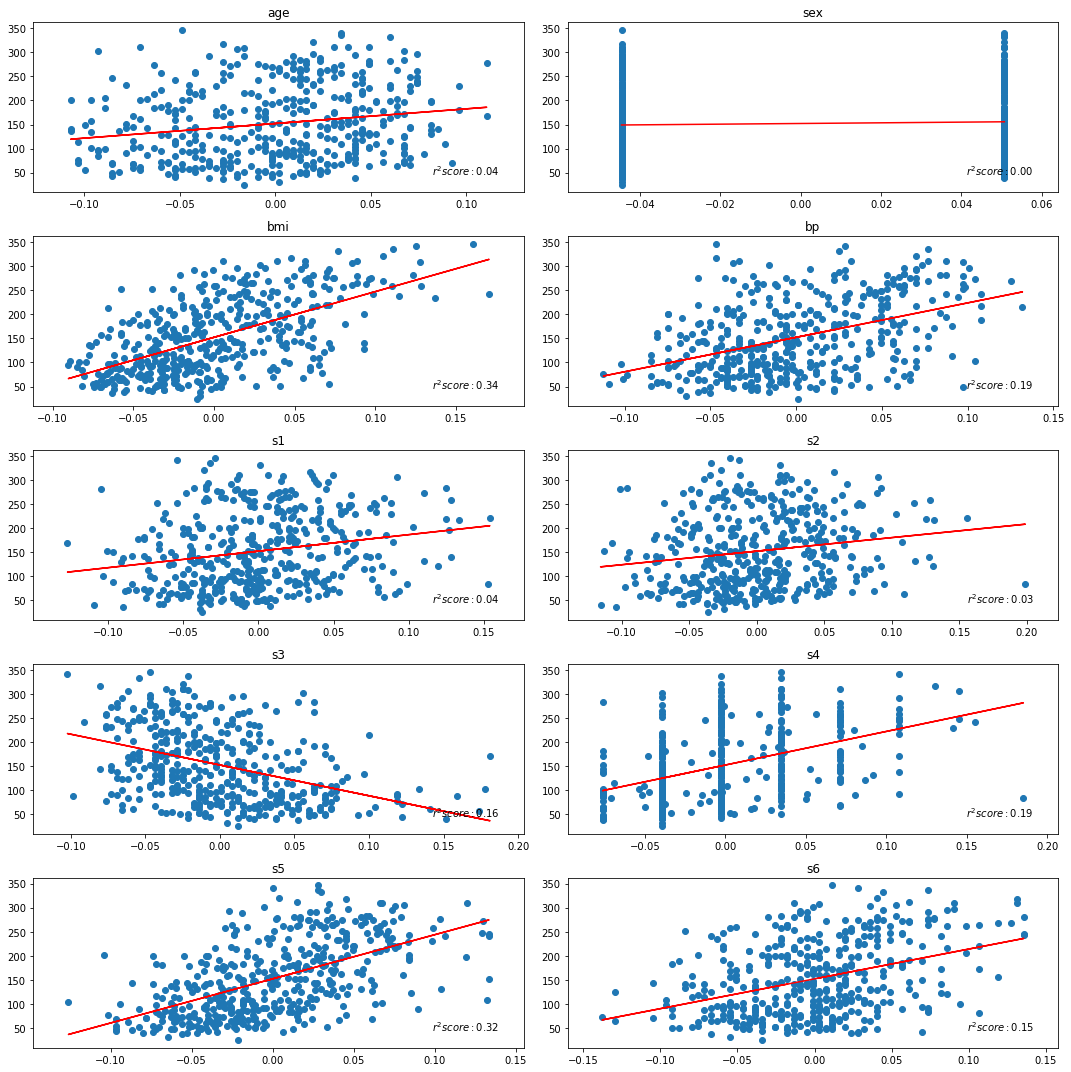

In [13]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(15, 15))
axes = axes.ravel()

y = diabetes_df['prog']
for ax, feature in zip(axes, [col for col in diabetes_df.columns if col != 'prog']):
    X = diabetes_df[[feature]] # notar, el doble corchete pare tener el shape (n_samples, 1)
    
    regr = linear_model.LinearRegression(fit_intercept=True)
    regr.fit(X, y)
    y_pred = regr.predict(X)
    
    ax.scatter(X, y)
    ax.plot(X, y_pred, color='red')
    ax.text(.95, .10, f'$r^2 score: {r2_score(y, y_pred):.02f}$', 
            ha='right', transform=ax.transAxes)
    ax.set_title(feature)

plt.tight_layout()

## Un poco de preprocesamiento de datos

In [14]:
example_array = np.array([
    [1., -1., 2.],
    [0., -1., 0.],
    [2., 0., 0.]
])

### Estandarización
Este método lo que hace es ajustar los datos de tal forma de que el promedio sea 0 y que la varianza sea 1.

In [15]:
scaler = preprocessing.StandardScaler()
scaler.fit(example_array)
scaled = scaler.transform(example_array)

print(scaled, end='\n\n')

print(scaled.mean(axis=0))
print(scaled.std(axis=0))

[[ 0.         -0.70710678  1.41421356]
 [-1.22474487 -0.70710678 -0.70710678]
 [ 1.22474487  1.41421356 -0.70710678]]

[ 0.00000000e+00 -7.40148683e-17  7.40148683e-17]
[1. 1. 1.]


Otra estandarización frecuente es la de escalar en un rango

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(example_array)

scaled = min_max_scaler.transform(example_array)

print(scaled)

[[0.5 0.  1. ]
 [0.  0.  0. ]
 [1.  1.  0. ]]


In [17]:
scaled = min_max_scaler.transform(np.array([[1., -1., 3.]]))

print(scaled)

[[0.5 0.  1.5]]


### Escalar datos con outliers
`scikit` recomienda usar `RobustScaler` en el caso de que los datos presenten muchos outliers

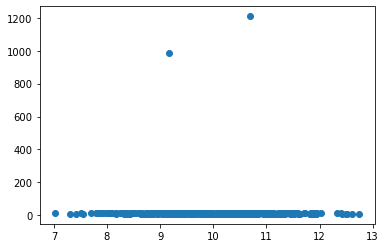

In [25]:
# Generacion de datos
random_sample = np.random.normal(10, 1, size=(500, 2))
random_mask = np.random.uniform(size=random_sample.shape[0]) > .995

random_sample[random_mask, 1] = random_sample[random_mask, 1]*100

plt.scatter(random_sample[:, 0], random_sample[:, 1]);

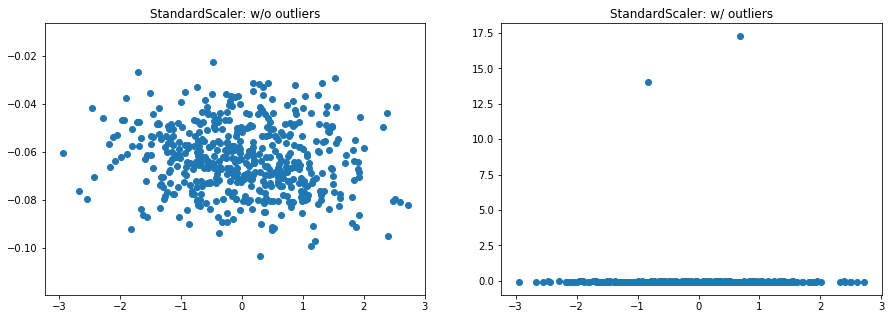

In [36]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

scaler = preprocessing.StandardScaler()
scaler.fit(random_sample)

scaled = scaler.transform(random_sample)
x, y = scaled[:, 0], scaled[:, 1]
x_no_outlier = x[abs(y - np.mean(y)) < 2*np.std(y)]
y_no_outlier = y[abs(y - np.mean(y)) < 2*np.std(y)]

ax[0].set_title('StandardScaler: w/o outliers')
ax[0].scatter(x_no_outlier, y_no_outlier);
ax[1].set_title('StandardScaler: w/ outliers')
ax[1].scatter(x, y);

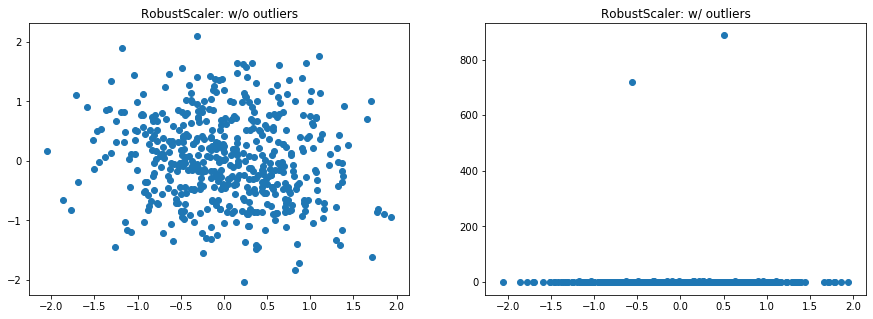

In [37]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

scaler = preprocessing.RobustScaler()
scaler.fit(random_sample)

scaled = scaler.transform(random_sample)
x, y = scaled[:, 0], scaled[:, 1]
x_no_outlier = x[abs(y - np.mean(y)) < 2*np.std(y)]
y_no_outlier = y[abs(y - np.mean(y)) < 2*np.std(y)]

ax[0].set_title('RobustScaler: w/o outliers')
ax[0].scatter(x_no_outlier, y_no_outlier);
ax[1].set_title('RobustScaler: w/ outliers')
ax[1].scatter(x, y);

### Encoder
Otra transformación útil es pasar de texto a números de forma discreta, ya que por lo general es mucho más práctico trabajar con estos.

In [22]:
string_example = np.array([
    ['male', 'from US', 'uses Safari'], 
    ['female', 'from Europe', 'uses Firefox'],
    ['male', 'from Europe', 'uses Firefox'],
    ['male', 'from Europe', 'uses Chrome']
])

encoder = preprocessing.OrdinalEncoder()
encoder.fit(string_example)

encoded = encoder.transform(string_example)

print(encoded, end='\n\n')

print(encoder.inverse_transform(encoded))


[[1. 1. 2.]
 [0. 0. 1.]
 [1. 0. 1.]
 [1. 0. 0.]]

[['male' 'from US' 'uses Safari']
 ['female' 'from Europe' 'uses Firefox']
 ['male' 'from Europe' 'uses Firefox']
 ['male' 'from Europe' 'uses Chrome']]
